In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [49]:
csv1 = pd.read_csv(r'C:\Users\97258\OneDrive - Ariel University\avoav\הדמיית נתונים סמסטר ב\train\train\7554\SimpleTest\10.csv', parse_dates=[' Time'])

In [50]:

print("Len:", len(csv1))
csv1.info()


Len: 1231
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   X          1231 non-null   object        
 1    Y         1229 non-null   float64       
 2    Pressure  1229 non-null   float64       
 3    TiltX     1229 non-null   float64       
 4    TiltY     1229 non-null   float64       
 5    Time      1229 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 57.8+ KB


In [51]:
csv1.columns

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')

In [52]:
#Fixing the space before any column title:
csv1.columns = ['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time']
csv1.columns

Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

In [53]:
def rename_column (csv):
    csv.rename(columns = {' Y':'Y' , ' TiltX':'TiltX' , ' Pressure':'Pressure', ' TiltY':'TiltY' , ' Time':'Time'}, inplace = True)

# Converting 'X' to float

In [54]:
#'X' col type is str.
type(csv1['X'][0])

str

In [55]:
#This happens cuz the last 2 rows, which are a summery
csv1[-2:]

,X,Y,Pressure,TiltX,TiltY,Time
1229,Time Elapsed till drawing started: 00:03.4787405,NaN,NaN,NaN,NaN,NaT
1230,Time Elapsed till drawing submit: 00:49.7523306,NaN,NaN,NaN,NaN,NaT


In [56]:
#If we remove them we can make 'X' col to float easly.
stu = csv1[0:-2]
stu.tail(5)

,X,Y,Pressure,TiltX,TiltY,Time
1224,1050.29033375678,383.905763,0.566400,-535.0,1786.0,2022-06-13 00:36:41
1225,1050.02702390576,383.695115,0.563470,-535.0,1786.0,2022-06-13 00:36:41
1226,1050.02702390576,383.695115,0.555657,-535.0,1786.0,2022-06-13 00:36:42
1227,1049.71105208454,383.589791,0.532219,-535.0,1786.0,2022-06-13 00:36:43
1228,1048.65781268045,383.853101,0.286366,-535.0,1786.0,2022-06-13 00:36:43


In [57]:
stu['X'] = pd.to_numeric(stu['X'], errors='coerce')
type(stu['X'][3])

numpy.float64

# Adding 'diff' col

In [58]:
stu["lag1"] = stu['Time'].shift(periods = 1)
stu.head()

,X,Y,Pressure,TiltX,TiltY,Time,lag1
0,946.388267,798.408130,0.186999,-4447.0,1009.0,2022-06-13 00:03:28,NaT
1,946.862224,796.512299,0.190906,-4447.0,1009.0,2022-06-13 00:03:29,2022-06-13 00:03:28
2,946.388267,794.774454,0.190417,-4199.0,927.0,2022-06-13 00:03:30,2022-06-13 00:03:29
3,945.598337,792.404666,0.223133,-4199.0,927.0,2022-06-13 00:03:31,2022-06-13 00:03:30
4,944.439774,789.613581,0.266835,-4199.0,927.0,2022-06-13 00:03:32,2022-06-13 00:03:31


In [59]:
stu["diff"] = stu['Time'].sub(stu["lag1"])
stu.head(5)

,X,Y,Pressure,TiltX,TiltY,Time,lag1,diff
0,946.388267,798.408130,0.186999,-4447.0,1009.0,2022-06-13 00:03:28,NaT,NaT
1,946.862224,796.512299,0.190906,-4447.0,1009.0,2022-06-13 00:03:29,2022-06-13 00:03:28,0 days 00:00:01
2,946.388267,794.774454,0.190417,-4199.0,927.0,2022-06-13 00:03:30,2022-06-13 00:03:29,0 days 00:00:01
3,945.598337,792.404666,0.223133,-4199.0,927.0,2022-06-13 00:03:31,2022-06-13 00:03:30,0 days 00:00:01
4,944.439774,789.613581,0.266835,-4199.0,927.0,2022-06-13 00:03:32,2022-06-13 00:03:31,0 days 00:00:01


In [60]:
#Let's make time units of measurement (for comparison)
op1 = stu["diff"][1] - stu["diff"][1] #0.00
op2 = stu["diff"][1] #0.01
op3 = stu["diff"][1] + stu["diff"][1] #0.02
print(op1)
print(op2)
print(op3)

0 days 00:00:00
0 days 00:00:01
0 days 00:00:02


In [61]:
#We decided that handlift will count if the diffrence between one point and he
stu[stu["diff"] > (stu["diff"][1]*10)]

,X,Y,Pressure,TiltX,TiltY,Time,lag1,diff
42,906.049197,729.157639,0.043931,-4139.0,1195.0,2022-06-13 00:06:01,2022-06-13 00:03:56,0 days 00:02:05
176,949.284675,795.564384,0.032456,-4226.0,1130.0,2022-06-13 00:08:25,2022-06-13 00:07:35,0 days 00:00:50
306,612.985333,855.441044,0.013901,-3311.0,-635.0,2022-06-13 00:12:18,2022-06-13 00:10:06,0 days 00:02:12
534,1020.483659,621.095277,0.176013,-3022.0,-1957.0,2022-06-13 00:16:52,2022-06-13 00:14:49,0 days 00:02:03
701,629.099896,632.575586,0.153063,-3297.0,524.0,2022-06-13 00:20:05,2022-06-13 00:18:38,0 days 00:01:27
848,680.550641,711.779189,0.090806,-3063.0,10.0,2022-06-13 00:31:12,2022-06-13 00:21:38,0 days 00:09:34
1027,435.777803,444.993648,0.233875,-403.0,2547.0,2022-06-13 00:34:31,2022-06-13 00:33:07,0 days 00:01:24


In [62]:
print("Hand lifts:", len(stu[stu["diff"] > stu["diff"][1]*10].dropna()))

Hand lifts: 7


 Making indexlist named handlift:

In [63]:
#First, we will create our 'handlift' according to the way we calculated above.
handlift = stu[stu["diff"] > stu["diff"][1]*10].index

#Then we will insert the '0' index, cuz the draw start at this point.
#The function 'union()' sorts automaticlly.
handlift = handlift.union([0])
handlift

Int64Index([0, 42, 176, 306, 534, 701, 848, 1027], dtype='int64')

Making indexlist named totallines:


In [64]:
totallines = handlift
totallines

Int64Index([0, 42, 176, 306, 534, 701, 848, 1027], dtype='int64')

# Graph viewing   

In [65]:
#Those parametrs are only for visualization
xmin = stu['X'].min() - 100
xmax = stu['X'].max() + 100
ymin = stu['Y'].min() - 100
ymax = stu['Y'].max() + 100


(331.40685991454, 1164.87769950341, 276.849058782769, 955.441044000462)

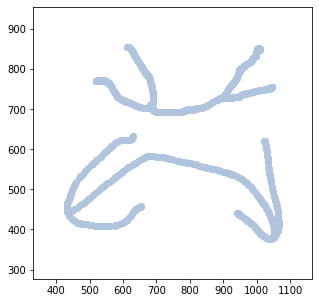

In [66]:
plt.figure(figsize=(5,5))
plt.plot(stu['X'], stu['Y'], 'o', color='lightsteelblue')
ax = plt.gca()
plt.axis([xmin, xmax, ymin, ymax])

In [67]:

def part_print(x1, x2):
    plt.figure(figsize=(5,5))
    plt.plot(stu['X'][x1:x2], stu['Y'][x1:x2], '-o', mew=2)
    ax = plt.gca()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title(x1)


# Counting Lines

# Helpful functions:  

In [68]:
#The function recives 2 points and returns the slope (SHIPUA) of the line bettwen them
def slopee(p1, p2): 
    return (stu['Y'][p1]-stu['Y'][p2]) / (stu['X'][p1]-stu['X'][p2])

In [69]:
def avgLengthPres(p1, p2):
    print(f'Average pressure: {stu.Pressure[p1:p2].mean()}, length: {np.sqrt(pow(stu.X[p1] - stu.X[p2], 2) + pow(stu.Y[p1] - stu.Y[p2], 2))}')

In [70]:
#The function recives a point and returns True if it is "close" to another point* in the draw
#*Not including its continune
def is_close(p1):
    #We assume that 2 point are called "close" if their distance is "DEFINED_CLOSE" or closer.
    SKIP = 40
    DEFINED_CLOSE = 4
    
    if (p1 == 0):
        #If there isn't a close point for the start of the draw, the draw is open.
        if (len(stu[stu.index > stu.index[p1+SKIP]][abs(stu['X'].sub(stu['X'][p1]))
                <= DEFINED_CLOSE][abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0):
            #print("error1", p1)
            return False
    else:
        #For each line that stop by lifting hand, check if there is a continune
        if ((len(stu[stu.index > stu.index[p1-1]][abs(stu['X'].sub(stu['X'][p1])) <= DEFINED_CLOSE]
            [abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0)
            and 
            (len(stu[stu.index < stu.index[p1-1] - SKIP][abs(stu['X'].sub(stu['X'][p1]))
            <= DEFINED_CLOSE][abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0)):
            #print("error2", p2)
            return False    
        
    return True

## Counting lines

In [71]:
lines = len(handlift) #Count of lines till yet, which is counting of hand lifting.
next = 0 #used as an index, always next = i+1

#Those next 3 are set by us
TAIL = 35 #Avoiding the great changes of the edges
SKIP = TAIL #Insted of checking point
STRIGHT = 0.7 #Number that we diagnosed to check diffrences between lines.
    
#print("Chosen tail:", TAIL)

#helpful functions:
    #slopee(p1, p2) - Calculate the slope (SHIPUA) between 2 points.
    #arctan(num) - Trigonomatric function

if (len(handlift) > 1):          
    for j in handlift[:-1]:
        next += 1
        for i in range(j, handlift[next]-2*TAIL, SKIP):
            x1 = i
            x2 = i+SKIP
            #print("(", x1, "," ,x2, "): angle: ", abs(np.arctan(slopee(x1, x2))))
            
            if (abs((abs(np.arctan(slopee(x1, x2)))) - (abs(np.arctan(slopee(x1+SKIP, x2+SKIP))))) > STRIGHT):
                #print("here!")
                totallines = totallines.union([i+SKIP])
                lines += 1
#print("--------------------------")
#Now we will check the part last part:
for i in range(handlift[next], len(stu)-TAIL, SKIP):      
        x1 = i
        x2 = i+SKIP           
        #print("(", x1, "," ,x2, "): angle: ", abs(np.arctan(slopee(x1, x2))))
        
        if (abs((abs(np.arctan(slopee(x1, x2)))) - (abs(np.arctan(slopee(x1+SKIP, x2+SKIP))))) > STRIGHT):
                #print("here!")
                totallines = totallines.union([i+SKIP])
                lines += 1
                
        if (x2 >= len(stu)-2*TAIL):
            #print("stop")
            break
        
print(f'Lines: {lines}')

Lines: 9


Now we can use visualization for the lines

In [72]:

print(handlift)
print(totallines)

Int64Index([0, 42, 176, 306, 534, 701, 848, 1027], dtype='int64')
Int64Index([0, 42, 176, 306, 411, 534, 701, 848, 1027], dtype='int64')


(331.40685991454, 1164.87769950341, 276.849058782769, 955.441044000462)

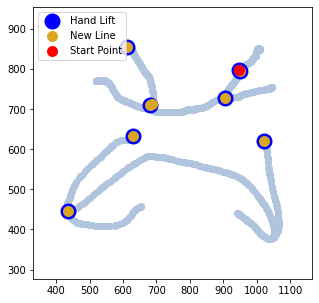

In [73]:
plt.figure(figsize=(5,5))
plt.plot(stu['X'], stu['Y'], 'o', color='lightsteelblue')

plt.plot(stu['X'][handlift], stu['Y'][handlift], 'o', color = 'blue', mew=10, label='Hand Lift')

plt.plot(stu['X'][totallines], stu['Y'][totallines], 'o', color = 'goldenrod', mew=5, label='New Line')

plt.plot(stu['X'][0], stu['Y'][0], 'or', mew=5, label='Start Point')

plt.legend()

ax = plt.gca()
plt.axis([xmin, xmax, ymin, ymax])


# Calculating average and pressure for each line
    

Question B:

In [74]:
next = 1

#Why if? cuz the last line is untill the end of the draw, which its index is not in "totallines"
if (len(totallines) > 1):
    for line in totallines[:-1]:
        print(f'Line {next}:')
        avgLengthPres(line, totallines[next])
        next += 1
        
print(f'Line {next}:')
avgLengthPres(totallines[-1], len(stu)-1)

Line 1:
Average pressure: 0.4742642105335281, length: 80.14281615140406
Line 2:
Average pressure: 0.565721868606868, length: 79.24116495495093
Line 3:
Average pressure: 0.4460815390715232, length: 341.58814627023276
Line 4:
Average pressure: 0.696644831768104, length: 160.52844817000496
Line 5:
Average pressure: 0.6950736271172036, length: 346.93818280849274
Line 6:
Average pressure: 0.5770396588448279, length: 391.55210011096625
Line 7:
Average pressure: 0.5765374358616718, length: 94.44781579040712
Line 8:
Average pressure: 0.517392078508212, length: 362.0611369631519
Line 9:
Average pressure: 0.5072025221526919, length: 615.9221316546394


## Is the draw opened or closed?

Question D:

In [75]:
 
flag = True
for lift in handlift:
    if (is_close(lift) == False):
        flag = False
        break
if (flag):
    print("The draw is closed")
else:
    print("The draw is opened")

The draw is closed
